In [5]:
# %load ../../load_magic/storage.py

import pickle
import pandas as pd
import os

# Change this to your data and saves folders
data_folder = r'../data/'
print('data_folder:', data_folder)
saves_folder = r'../saves/'
print('saves_folder:', saves_folder)

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][2]

def load_csv(csv_name=None, folder_path=None):
    if folder_path is None:
        csv_folder = data_folder + 'csv/'
    else:
        csv_folder = folder_path + 'csv/'
    if csv_name is None:
        csv_path = max([os.path.join(csv_folder, f) for f in os.listdir(csv_folder)],
                       key=os.path.getmtime)
    else:
        csv_path = csv_folder + csv_name + '.csv'
    data_frame = pd.read_csv(csv_path, encoding=encoding)
    
    return(data_frame)

def load_dataframes(**kwargs):
    frame_dict = {}
    for frame_name in kwargs:
        pickle_path = saves_folder + 'pickle/' + frame_name + '.pickle'
        if not os.path.isfile(pickle_path):
            print('No pickle exists at ' + pickle_path + ' - attempting to load a saves folder csv.')
            csv_folder = saves_folder + 'csv/'
            csv_path = csv_folder + frame_name + '.csv'
            if not os.path.isfile(csv_path):
                print('No csv exists at ' + csv_path + ' - trying the data folder.')
                csv_path = data_folder + 'csv/' + frame_name + '.csv'
                if not os.path.isfile(csv_path):
                    print('No csv exists at ' + csv_path + ' - just forget it.')
                    frame_dict[frame_name] = None
                else:
                    frame_dict[frame_name] = load_csv(csv_name=frame_name)
            else:
                frame_dict[frame_name] = load_csv(csv_name=frame_name, folder_path=csv_folder)
        else:
            frame_dict[frame_name] = load_object(frame_name)
    
    return frame_dict

def load_object(obj_name, download_url=None):
    pickle_path = saves_folder + 'pickle/' + obj_name + '.pickle'
    if not os.path.isfile(pickle_path):
        print('No pickle exists at ' + pickle_path + ' - attempting to load as csv.')
        csv_path = saves_folder + 'csv/' + obj_name + '.csv'
        if not os.path.isfile(csv_path):
            print('No csv exists at ' + csv_path + ' - attempting to download from URL.')
            object = pd.read_csv(download_url, low_memory=False,
                                 encoding=encoding)
        else:
            object = pd.read_csv(csv_path, low_memory=False,
                                 encoding=encoding)
        if isinstance(object, pd.DataFrame):
            attempt_to_pickle(object, pickle_path, raise_exception=False)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(object, handle, pickle.HIGHEST_PROTOCOL)
    else:
        try:
            object = pd.read_pickle(pickle_path)
        except:
            with open(pickle_path, 'rb') as handle:
                object = pickle.load(handle)
    
    return(object)

def save_dataframes(include_index=False, **kwargs):
    csv_folder = saves_folder + 'csv/'
    for frame_name in kwargs:
        if isinstance(kwargs[frame_name], pd.DataFrame):
            csv_path = csv_folder + frame_name + '.csv'
            kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding,
                                      index=include_index)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = saves_folder + 'pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            attempt_to_pickle(kwargs[obj_name], pickle_path, raise_exception=False)
        else:
            print('Pickling to ' + pickle_path)
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

def attempt_to_pickle(df, pickle_path, raise_exception=False):
    try:
        print('Pickling to ' + pickle_path)
        df.to_pickle(pickle_path)
    except Exception as e:
        os.remove(pickle_path)
        print(e, ': Couldn\'t save ' + '{:,}'.format(df.shape[0]*df.shape[1]) + ' cells as a pickle.')
        if raise_exception:
            raise

data_folder: ../data/
saves_folder: ../saves/


In [60]:

file_name = r'../data/html/Ethnic_and_Cultural_diversity.html'
fearon_df = pd.read_html(file_name)[0]
fearon_df.columns = ['Ethnic_diversity_rank', 'Country', 'Ethnic_fractionalization_index',
                     'Cultural_diversity_index']
fearon_df.sample(10).T

,132,44,83,117,148,14,42,32,41,8
Ethnic_diversity_rank,133,45,84,118,149,15,43,33,42,9
Country,Rwanda,Guinea,Guatemala,Mongolia,Haiti,Guinea-Bissau,Nepal,United Arab Emirates,Kyrgyzstan,Congo
Ethnic_fractionalization_index,0.18,0.669,0.493,0.272,0.095,0.818,0.677,0.737,0.679,0.878
Cultural_diversity_index,0,0.49,0.493,0.227,0,0.568,0.542,0.65,0.624,0.562


In [58]:

file_name = r'../data/html/Ethnic_Linguistic_and_Religious_Fractionalization.html'
alesina_df = pd.read_html(file_name)[0]
alesina_df.columns = ['Fractionalization_rank', 'Country', 'Ethnic_fractionalization',
                      'Linguistic_fractionalization', 'Religious_fractionalization']
alesina_df.sample(10).T

,195,148,69,19,146,192,114,65,166,193
Fractionalization_rank,196,149,70,20,147,193,115,66,167,194
Country,Tunisia,Pakistan,Gaza Strip,Belize,Norway,Togo,Luxembourg,French Guiana,San Marino,Tonga
Ethnic_fractionalization,0.0394,0.7098,0,0.7015,0.0586,0.7099,0.5302,0,0.2927,0.0869
Linguistic_fractionalization,0.0124,0.719,0.0104,0.6303,0.0673,0.898,0.644,0.1154,0,0.3782
Religious_fractionalization,0.0104,0.3848,0.0342,0.5813,0.2048,0.6596,0.0911,0.4959,0.1975,0.6214


In [64]:

file_name = r'../data/html/UNODC_murder_rates.html'
unodc_df = pd.read_html(file_name)[0]
unodc_df.columns = ['Country', 'Murder_rate', 'Murder_count', 'Region', 'Subregion', 'Year_listed', 'UNODC_notes']
unodc_df.sample(10).T

,67,156,168,16,50,198,89,112,189,122
Country,Guadeloupe (France),Belarus,Finland,Uganda,Mauritania,Netherlands,Greenland (Denmark),Macao,Spain,Laos
Murder_rate,7.9,3.58,1.6,11.84,10.22,0.61,12.46,0.17,0.66,6.87
Murder_count,36,340,88,4473,416,104,7,1,303,467
Region,Americas,Europe,Europe,Africa,Africa,Europe,Americas,Asia,Europe,Asia
Subregion,Caribbean,Eastern Europe,Northern Europe,Eastern Africa,Western Africa,Western Europe,Northern America,Eastern Asia,Southern Europe,South-Eastern Asia
Year_listed,2009,2014,2015,2014,2015,2015,2015,2015,2015,2015
UNODC_notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:

file_name = r'../data/html/List_of_countries_by_estimated_number_of_guns_per_capita.html'
karp_df = pd.read_html(file_name)[0]
karp_df.columns = ['Gun_rank', 'Country', 'Guns_per_100_residents', 'Karp_notes']
karp_df.sample(10).T

,108,119,118,82,135,53,156,25,4,125
Gun_rank,108,119,118,82,135,54,156,26,5,125
Country,Myanmar,Congo,Djibouti,United Kingdom,Brunei,Malta,Nepal,Panama,Saudi Arabia,Vietnam
Guns_per_100_residents,4,2.7,2.8,6.2,1.4,11.9,0.8,21.7,35,1.7
Karp_notes,NaN,NaN,NaN,Data for England and Wales only,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:

%pprint

sorted(list(set(fearon_df['Country']) ^ set(alesina_df['Country'])))

Pretty printing has been turned OFF


['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Brunei', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Iceland', 'Isle of Man', 'Jersey', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Luxembourg', 'Macau', 'Malta', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Qatar', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovakia', 'Solomon Islands', 'South Korea', 'Sovie

In [44]:

%pprint

sorted(list(set(fearon_df['Country']) ^ set(unodc_df['Country'])))

Pretty printing has been turned OFF


['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bahamas', 'Barbados', 'Belize', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Brunei', 'Burma', 'Cape Verde', 'Cayman Islands (UK)', 'Comoros', 'Congo', 'Cook Islands', 'Czechoslovakia (1918â\x80\x931992)', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Equatorial Guinea', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Iceland', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Palestine', 'Puerto Rico (US)', 'Qatar', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', '

In [42]:

%pprint

sorted(list(set(fearon_df['Country']) ^ set(karp_df['Country'])))

Pretty printing has been turned OFF


['Bahamas', 'Barbados', 'Belize', 'Brunei', 'Burma', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Iceland', 'Ivory Coast', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Luxembourg', 'Macedonia', 'Maldives', 'Malta', 'Montenegro', 'Myanmar', 'Palestine', 'Qatar', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Soviet Union (1922â\x80\x931991)', 'Sudan (1955â\x80\x932011)', 'Sudan South Sudan', 'Suriname', 'Taiwan', 'Timor-Leste', 'Transnistria', 'World', 'Yugoslavia (1943â\x80\x931992)']

In [40]:

%pprint

sorted(list(set(alesina_df['Country']) ^ set(unodc_df['Country'])))

Pretty printing has been turned OFF


['American Samoa', 'Anguilla (UK)', 'Aruba', 'Aruba (Netherlands)', 'Bermuda', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Burma', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Faroe Islands', 'French Guiana', 'French Guiana (France)', 'French Polynesia', 'French Polynesia (France)', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Greenland (Denmark)', 'Guadeloupe', 'Guadeloupe (France)', 'Guam', 'Guam (US)', 'Isle of Man', 'Jersey', 'Korea, North', 'Korea, South', 'Kosovo', 'Macao', 'Macau', 'Maldives', 'Martinique', 'Martinique (France)', 'Mayotte', 'Mayotte (France)', 'Micronesia', 'Micronesia, Fed. Sts.', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'New Caledonia (France)', 'Niue', 'North Korea', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Puerto Rico (US)', 'Republic of the Congo', 'Reunion', 'Russia', 'Russian Federation', 'RÃ©union (France)', 'Sai

In [38]:

%pprint

sorted(list(set(alesina_df['Country']) ^ set(karp_df['Country'])))

Pretty printing has been turned OFF


['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bermuda', 'Burma', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Isle of Man', 'Ivory Coast', 'Jersey', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Macau', 'Macedonia', 'Maldives', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montenegro', 'Myanmar', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Puerto Rico', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Slovak Republic', 'Slovakia', 'South Korea', 'Sudan', 'Sudan South Sudan', 'Taiwa

In [36]:

%pprint

sorted(list(set(unodc_df['Country']) ^ set(karp_df['Country'])))

Pretty printing has been turned OFF


['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', "CÃ´te d'Ivoire", 'Dominica', 'East Timor', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Ivory Coast', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Macao', 'Macedonia', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montserrat (UK)', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Puerto Rico (US)', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon (France)', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'South Sudan', 'Sudan', 'Sudan South Sudan', 'Taiwan', 'Timor-Leste', 'Tonga', 'Transnistria', 'Turks and Caicos Islands

In [100]:

%pprint

country_list = sorted(list(set(fearon_df['Country']) & set(alesina_df['Country']) &
                           set(unodc_df['Country']) & set(karp_df['Country'])))
country_list

Pretty printing has been turned OFF


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', '

In [137]:

merge_df = pd.merge(left=fearon_df, right=alesina_df, how='inner', on=['Country'], suffixes=('_fearon', '_alesina'))
merge_df.sample(10).T

,69,83,62,112,102,46,22,50,23,66
Ethnic_diversity_rank,75,90,68,121,111,51,24,55,25,72
Country,Burma,Morocco,Bahrain,Costa Rica,Algeria,Peru,Indonesia,Benin,Mozambique,Macedonia
Ethnic_fractionalization_index,0.522,0.479,0.551,0.238,0.32,0.638,0.766,0.622,0.765,0.535
Cultural_diversity_index,0.419,0.36,0.46,0.078,0.237,0.506,0.522,0.4,0.285,0.432
Fractionalization_rank,135,133,15,44,3,154,89,21,134,117
Ethnic_fractionalization,0.5062,0.4841,0.5021,0.2368,0.3394,0.6566,0.7351,0.7872,0.6932,0.5023
Linguistic_fractionalization,0.5072,0.4683,0.4344,0.0489,0.4427,0.3358,0.768,0.7905,0.8125,0.5021
Religious_fractionalization,0.1974,0.0035,0.5528,0.241,0.0091,0.1988,0.234,0.5544,0.6759,0.5899


In [138]:

merge_df = pd.merge(left=merge_df, right=unodc_df, how='inner', on=['Country'], suffixes=('_merge', '_unodc'))
merge_df.sample(10).T

,36,62,34,108,42,44,110,79,135,130
Ethnic_diversity_rank,43,70,41,120,49,51,122,89,147,142
Country,Nepal,Brazil,Bosnia and Herzegovina,Argentina,Eritrea,Peru,Vietnam,Laos,Albania,Finland
Ethnic_fractionalization_index,0.677,0.549,0.681,0.255,0.647,0.638,0.233,0.481,0.097,0.132
Cultural_diversity_index,0.542,0.02,0.146,0,0.398,0.506,0.21,0.02,0.082,0.132
Fractionalization_rank,138,27,25,8,59,154,209,107,2,64
Ethnic_fractionalization,0.6632,0.5408,0.63,0.255,0.6524,0.6566,0.2383,0.5139,0.2204,0.1315
Linguistic_fractionalization,0.7167,0.0468,0.6751,0.0618,0.653,0.3358,0.2377,0.6382,0.0399,0.1412
Religious_fractionalization,0.1417,0.6054,0.6851,0.2236,0.4253,0.1988,0.508,0.5453,0.4719,0.2531
Murder_rate,2.27,26.74,1.5,6.53,7.46,7.16,1.52,6.87,2.28,1.6
Murder_count,639,55574,57,2837,390,2247,1358,467,117,88


In [139]:

merge_df = pd.merge(left=merge_df, right=karp_df, how='inner', on=['Country'], suffixes=('_merge', '_karp'))
merge_df.sample(10).T

,1,43,100,18,98,22,121,54,91,42
Ethnic_diversity_rank,2,51,114,23,112,28,136,62,103,50
Country,Tanzania,Peru,Bulgaria,Chad,Romania,Ethiopia,Egypt,Syria,Cyprus,Trinidad and Tobago
Ethnic_fractionalization_index,0.953,0.638,0.299,0.772,0.3,0.76,0.164,0.581,0.359,0.647
Cultural_diversity_index,0.564,0.506,0.25,0.727,0.265,0.562,0,0.235,0.359,0.38
Fractionalization_rank,191,154,29,37,161,61,56,188,48,195
Ethnic_fractionalization,0.7353,0.6566,0.4021,0.862,0.3069,0.7235,0.1836,0.5399,0.0939,0.6475
Linguistic_fractionalization,0.8983,0.3358,0.3031,0.8635,0.1723,0.8073,0.0237,0.1817,0.3962,0.1251
Religious_fractionalization,0.6334,0.1988,0.5965,0.6411,0.2373,0.6249,0.1979,0.431,0.3962,0.7936
Murder_rate,7.01,7.16,1.8,9.02,1.49,7.6,3.23,2.23,1.29,30.88
Murder_count,3746,2247,129,1266,291,7552,2703,463,15,420


In [140]:

import math

def get_column_descriptions(df, column_list=None):
    
    if column_list is None:
        column_list = df.columns
    g = df.columns.to_series().groupby(df.dtypes).groups
    rows_list = []
    for dtype, dtype_column_list in g.items():
        for column_name in dtype_column_list:
            if column_name in column_list:
                
                # Get input row in dictionary format; key = col_name
                row_dict = {}
                row_dict['column_name'] = column_name
                row_dict['dtype'] = dtype
                row_dict['count_blanks'] = df[column_name].isnull().sum()
                row_dict['count_uniques'] = len(df[column_name].unique())
                
                # Count how many zeroes the column has
                try:
                    row_dict['count_zeroes'] = int((df[column_name] == 0).sum())
                except Exception:
                    row_dict['count_zeroes'] = math.nan
                
                # Check to see if the column has any dates
                date_series = pd.to_datetime(df[column_name], errors='coerce')
                null_series = date_series[~date_series.notnull()]
                row_dict['has_dates'] = (null_series.shape[0] < date_series.shape[0])

                rows_list.append(row_dict)

    ranking_columns = ['column_name', 'dtype', 'count_blanks', 'count_uniques', 'count_zeroes', 'has_dates']
    blank_ranking_df = pd.DataFrame(rows_list, columns=ranking_columns)
    
    return(blank_ranking_df)

In [141]:

merge_df['Murder_count'] = merge_df['Murder_count'].map(lambda x: int(x))

In [142]:

merge_df['Gun_rank'] = merge_df['Gun_rank'].map(lambda x: int(x))

In [143]:

merge_df['Region_code'] = pd.Categorical(merge_df['Region']).codes

In [144]:

merge_df['Subregion_code'] = pd.Categorical(merge_df['Subregion']).codes

In [145]:

merge_df = merge_df.sort_values('Linguistic_fractionalization')
merge_df['Cultural_diversity_index'] = merge_df['Cultural_diversity_index'].interpolate()

In [146]:

merge_df = merge_df.set_index(['Country'])

In [155]:

def check_4_correlation(df, column_list=None):
    if column_list is None:
        column_list = df.columns
    rows_list = []
    n = len(column_list)
    for i in range(n-1):
        first_column = column_list[i]
        max_correlation = 0.0
        max_column = first_column
        for j in range(i+1, n):
            second_column = column_list[j]

            # Assume the first column is never identical to the second column
            this_correlation = df[first_column].corr(df[second_column])
            
            if this_correlation > max_correlation:
                max_correlation = this_correlation
                max_column = second_column

        # Get input row in dictionary format; key = col_name
        if first_column != max_column:
            row_dict = {}
            row_dict['first_column'] = first_column
            row_dict['second_column'] = max_column
            row_dict['max_correlation'] = max_correlation

            rows_list.append(row_dict)

    column_list = ['first_column', 'second_column', 'max_correlation']
    column_correlations_df = pd.DataFrame(rows_list, columns=column_list)

    return column_correlations_df

In [156]:

column_correlations_df = check_4_correlation(merge_df, column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
6,Ethnic_fractionalization_index,Ethnic_fractionalization,0.830909
7,Cultural_diversity_index,Linguistic_fractionalization,0.692981
8,Ethnic_fractionalization,Linguistic_fractionalization,0.679794
0,Region_code,Ethnic_diversity_rank,0.466551
9,Linguistic_fractionalization,Religious_fractionalization,0.329715
4,Murder_count,Murder_rate,0.295284
5,Gun_rank,Linguistic_fractionalization,0.266125
1,Subregion_code,Guns_per_100_residents,0.230024
2,Ethnic_diversity_rank,Guns_per_100_residents,0.198176
3,Fractionalization_rank,Guns_per_100_residents,0.090837


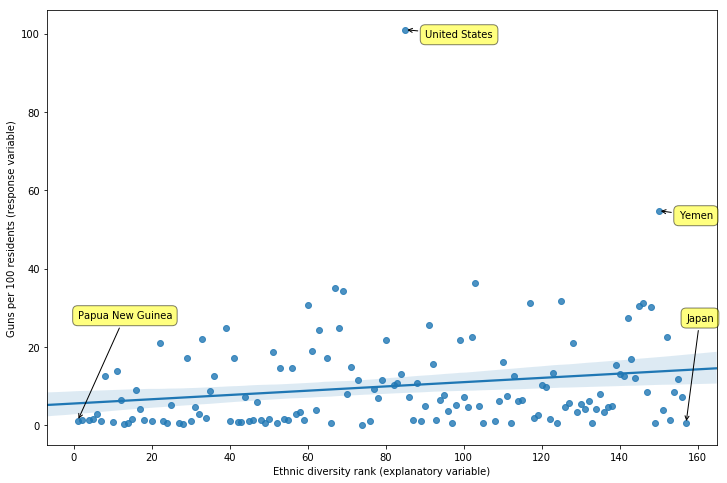

In [157]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
scatter_kws = dict(facecolors=merge_df['Subregion_code'])
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Guns_per_100_residents',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Guns per 100 residents (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Guns_per_100_residents']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

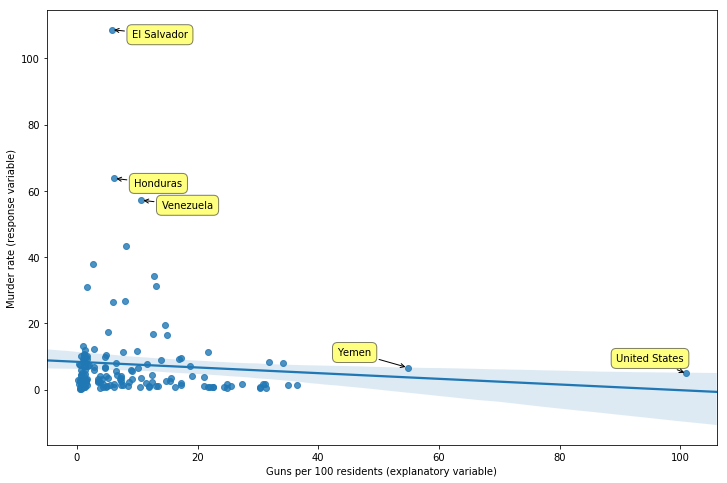

In [158]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Guns_per_100_residents', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Guns per 100 residents (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(merge_df.index, merge_df['Guns_per_100_residents'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-70, 10), **kwargs)

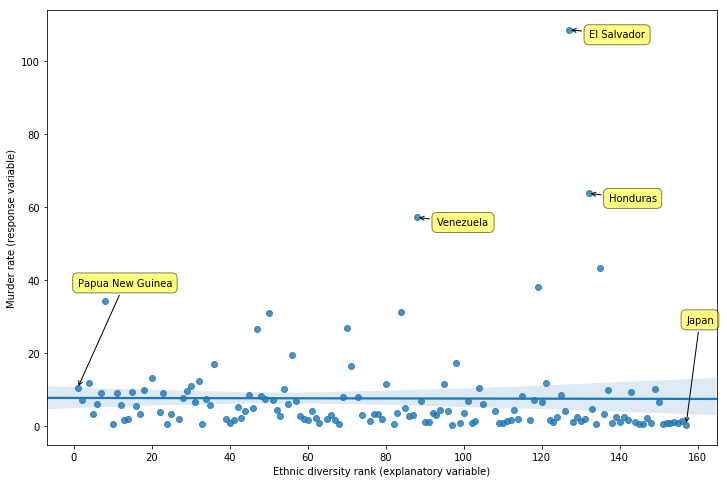

In [159]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

In [161]:

column_descriptions_df = get_column_descriptions(merge_df)
column_descriptions_df

,column_name,dtype,count_blanks,count_uniques,count_zeroes,has_dates
0,Region_code,int8,0,5,43,True
1,Subregion_code,int8,0,20,2,True
2,Ethnic_diversity_rank,int64,0,143,0,True
3,Fractionalization_rank,int64,0,143,0,True
4,Murder_count,int64,0,135,0,True
5,Year_listed,int64,0,6,0,True
6,Gun_rank,int64,0,142,0,True
7,Ethnic_fractionalization_index,float64,0,132,0,True
8,Cultural_diversity_index,float64,0,120,6,True
9,Ethnic_fractionalization,float64,0,141,1,True


In [170]:

match_series = (column_descriptions_df['dtype']!='object')
numeric_columns = column_descriptions_df[match_series]['column_name'].tolist()

In [171]:

%pprint

numeric_columns.remove('Year_listed')
numeric_columns.remove('Gun_rank')
numeric_columns.remove('Region_code')
numeric_columns.remove('Subregion_code')
numeric_columns.remove('Murder_count')
numeric_columns.remove('Ethnic_diversity_rank')
numeric_columns.remove('Fractionalization_rank')
numeric_columns.remove('Ethnic_fractionalization')
print(numeric_columns)

Pretty printing has been turned ON
['Ethnic_fractionalization_index', 'Cultural_diversity_index', 'Linguistic_fractionalization', 'Religious_fractionalization', 'Murder_rate', 'Guns_per_100_residents']


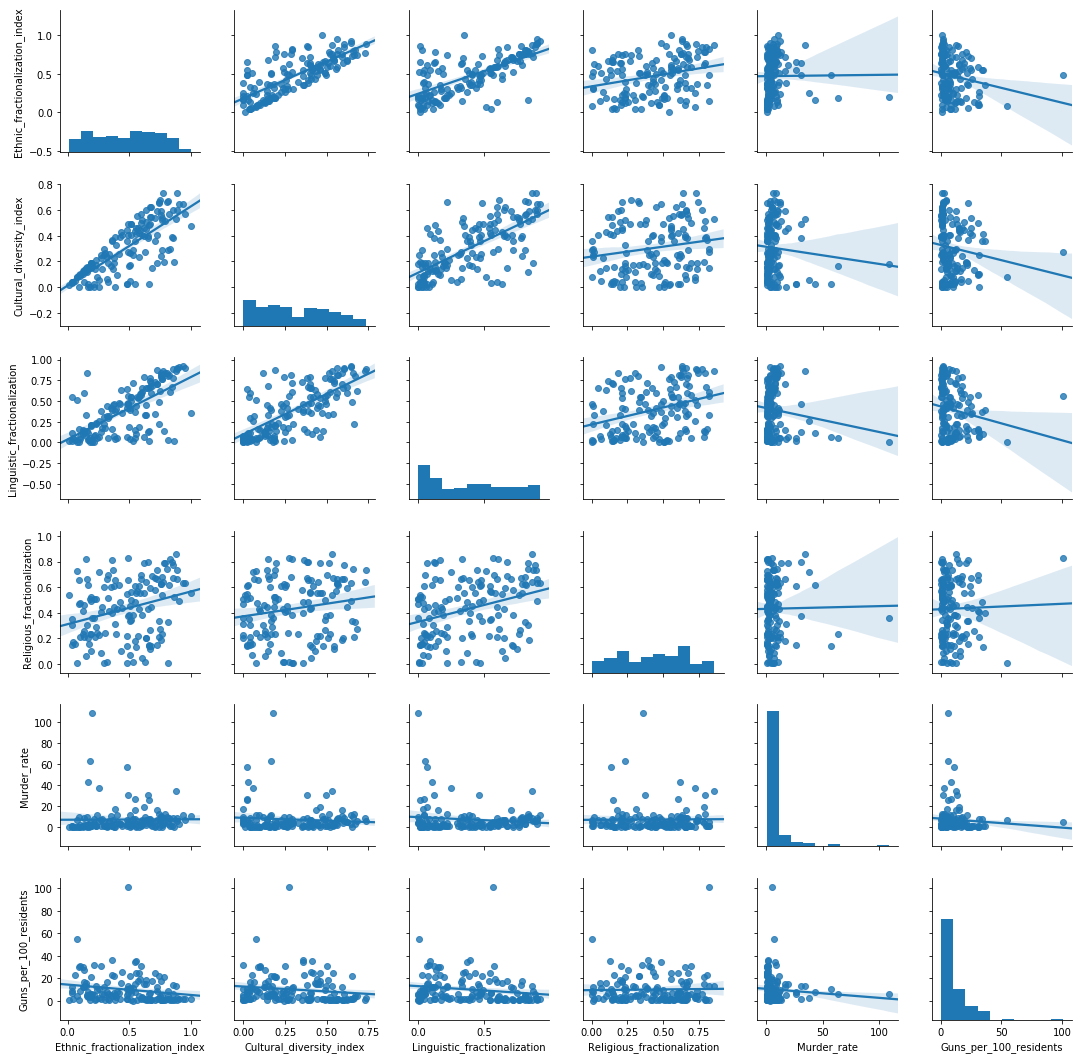

In [172]:

merge_pair_grid = sns.pairplot(merge_df[numeric_columns], kind='reg')

In [173]:

column_correlations_df = check_4_correlation(merge_df[numeric_columns], column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
0,Ethnic_fractionalization_index,Cultural_diversity_index,0.768347
1,Cultural_diversity_index,Linguistic_fractionalization,0.692981
2,Linguistic_fractionalization,Religious_fractionalization,0.329715
3,Religious_fractionalization,Guns_per_100_residents,0.022810


In [202]:

least_murderous = merge_df['Murder_rate'].min()

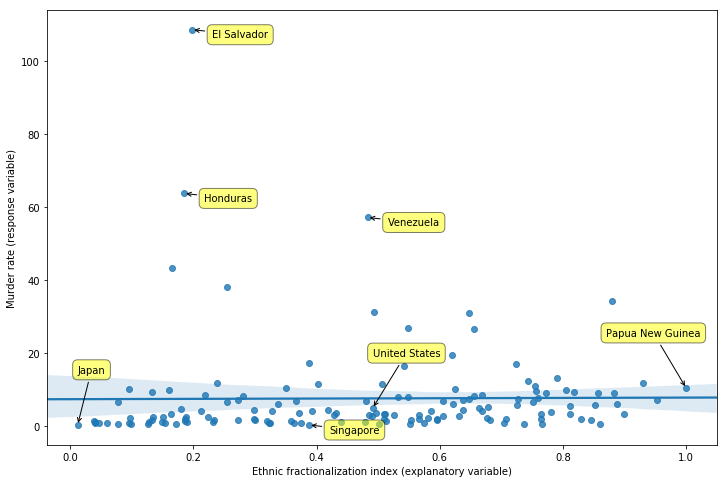

In [201]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_fractionalization_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Ethnic_fractionalization_index'].min()
most_fractional = merge_df['Ethnic_fractionalization_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_fractionalization_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

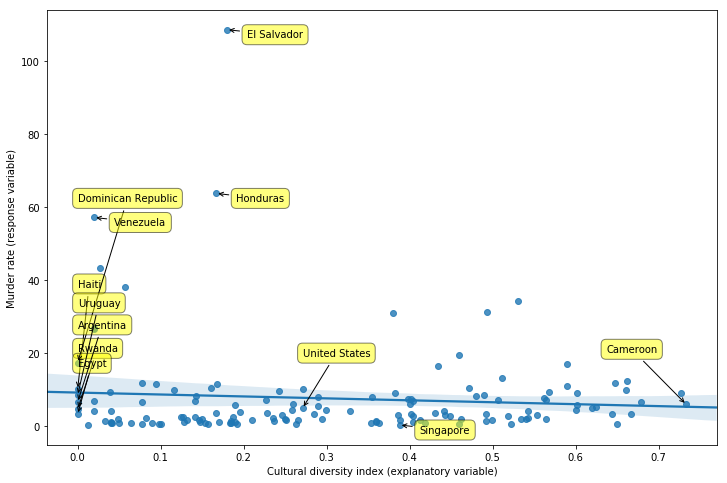

In [203]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Cultural_diversity_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Cultural diversity index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_diverse = merge_df['Cultural_diversity_index'].min()
most_diverse = merge_df['Cultural_diversity_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Cultural_diversity_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == most_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

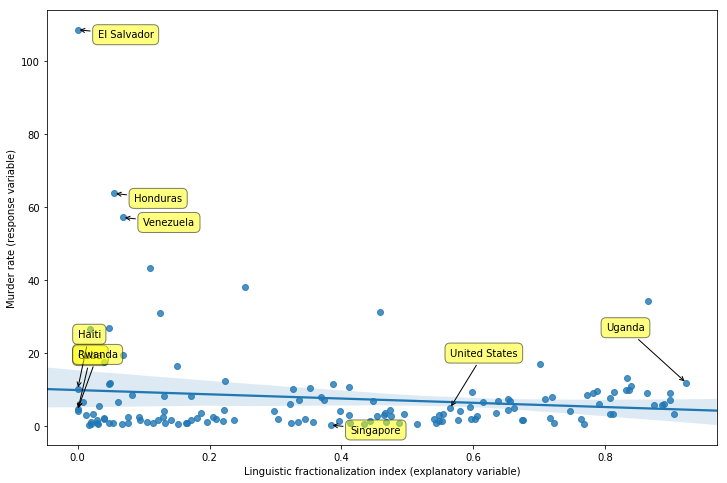

In [204]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Linguistic_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Linguistic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Linguistic_fractionalization'].min()
most_fractional = merge_df['Linguistic_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Linguistic_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

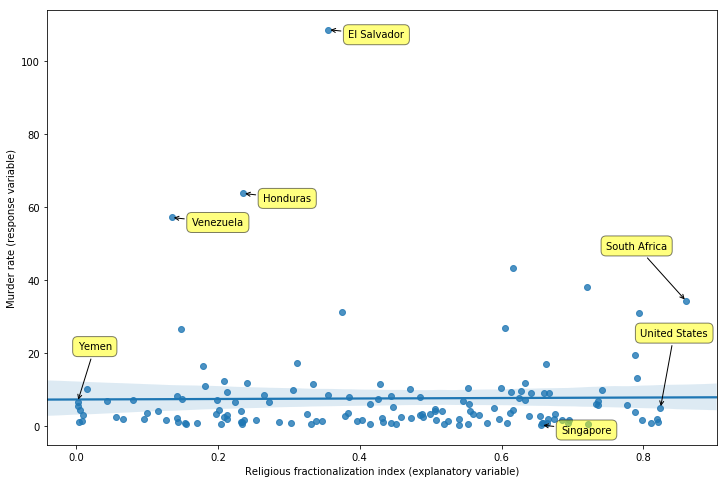

In [205]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Religious_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Religious fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Religious_fractionalization'].min()
most_fractional = merge_df['Religious_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Religious_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)

In [208]:

file_name = r'../data/html/average-iq-by-country.html'
iq_df = pd.read_html(file_name)[0]
iq_df.columns = ['IQ_Rank', 'Country', 'IQ']
iq_df.sample(10).T

,1,160,139,130,87,90,71,109,49,2
IQ_Rank,1,37,30,27,22,22,19,23,15,2
Country,Singapore,Ethiopia,Comoros,Bhutan,Eritrea,Peru,Samoa,United Arab Emirates,Ireland,South Korea
IQ,108,69,77,80,85,85,88,84,92,106


In [209]:

merge_df.reset_index(level=0, inplace=True)
merge_df = pd.merge(left=merge_df, right=iq_df, how='inner', on=['Country'], suffixes=('_merge', '_iq'))
merge_df.sample(10).T

,116,45,78,68,132,8,86,82,112,94
Country,Burkina Faso,Swaziland,Zimbabwe,Mongolia,Chad,Portugal,United Arab Emirates,Belarus,Namibia,Moldova
Ethnic_diversity_rank,40,115,101,118,23,154,33,100,36,78
Ethnic_fractionalization_index,0.704,0.28,0.366,0.272,0.772,0.04,0.737,0.372,0.724,0.51
Cultural_diversity_index,0.354,0.143,0.141,0.227,0.727,0.04,0.65,0.228,0.589,0.401
Fractionalization_rank,30,185,215,132,37,157,202,18,136,130
Ethnic_fractionalization,0.7377,0.0582,0.3874,0.3682,0.862,0.0468,0.6252,0.3222,0.6329,0.5535
Linguistic_fractionalization,0.7228,0.1722,0.4472,0.3734,0.8635,0.0198,0.4874,0.4666,0.7005,0.5533
Religious_fractionalization,0.5798,0.4444,0.7363,0.0799,0.6411,0.1438,0.331,0.6116,0.6626,0.5603
Murder_rate,0.71,8.16,6.74,7.23,9.02,0.97,0.66,3.58,16.93,3.19
Murder_count,117,102,981,214,1266,100,60,340,388,130


In [210]:

merge_df = merge_df.set_index(['Country'])

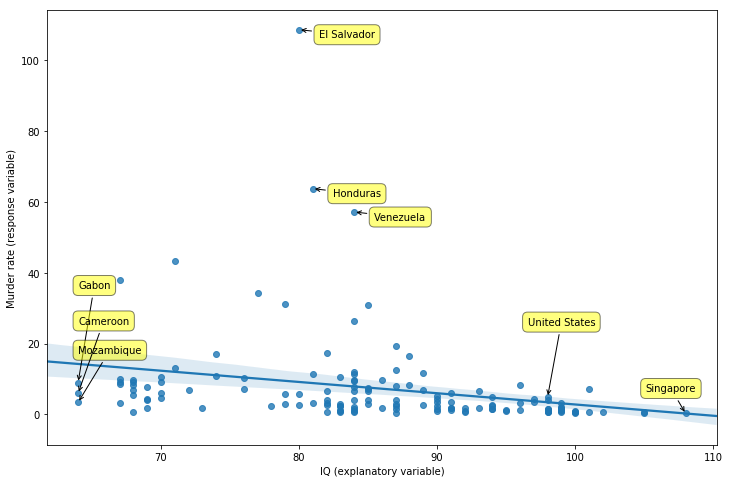

In [216]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='IQ', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('IQ (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
dumbest = merge_df['IQ'].min()
smartest = merge_df['IQ'].max()
for label, x, y in zip(merge_df.index, merge_df['IQ'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-40, 20), **kwargs)
    elif (x == dumbest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == smartest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)